<a href="https://colab.research.google.com/github/ilyandho/FPL-Optimal-Transfer/blob/main/FPL_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fetch and extract important attributes from FPL API
 Store the data to *`player_data.csv`*

In [1]:
import requests, json
import pandas as pd

base_url = 'https://fantasy.premierleague.com/api/'

# This functionn fetches the player details using FPL API up to a given week
def get_player_data(gw):
  # Get the general, inorder to have access to the team ids in the elements component
  general_info = requests.get(base_url + "/bootstrap-static/").json()

  # player_history will contain the data
  player_history = []

  # For each game week, the stats for all players
  for gwk in range(1,gw+1):
    r = requests.get(base_url + 'event/' + str(gwk) + '/live/').json()
    # Get the fixtures for each game week gwk.
    # It will contain 10 matches with each match containing the stats for the home and away team difficulty rating.
    fixture = requests.get(base_url + 'fixtures?event='+ str(gwk)).json()

    # For each player we will also need the match difficulty for both player's team and plyaer's opponent team.
    for player in r['elements']:

      team_h_difficulty = 0
      team_a_difficulty = 0

      # Get the player element id in the player component and compare it to the id of the element in elements component of general_info
      # Also get the player position which will later be used to filter the data by position
      player_team = None
      position = None
      for element in general_info['elements']:
        if player['id'] == element['id']:
          player_team = element['team']
          position = element['element_type']

      # For each match in the fixture array, we compare the player team id with the away team and home team ids in the match.
      # If they match either, then update team_h_difficulty and team_a_difficulty
      for match_ in fixture:
        if player_team == match_['team_a'] or player_team == match_['team_h']:
          team_h_difficulty = match_['team_h_difficulty']
          team_a_difficulty = match_['team_a_difficulty']

      # Create a temporary variable containing the gwk, team_a_difficulty, team_h_difficulty and position
      temp_data = {'id': int(player['id']), 'gw':gwk,'team_h_difficulty': team_h_difficulty, 'team_a_difficulty':team_a_difficulty, 'position':position}

      # The stats element in each player component contains:
      #  - minutes, goals_scored, assists, clean_sheets, goals_conceded, own_goals, penalties_saved,
      #  - penalties_missed, yellow_cards, red_cards, saves, bonus, bps, influence,
      #  - creativity, threat, ict_index, starts, expected_goals, expected_assists,
      #  - expected_goal_involvements, expected_goals_conceded, total_points, in_dreamteam
      for key in player['stats'].keys():
        temp_data.update({key: player['stats'][key]})

      # Append the player info to the player_history array
      player_history.append(temp_data)
  return player_history


player_data = pd.DataFrame(get_player_data(30))

player_data



,id,gw,team_h_difficulty,team_a_difficulty,position,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam
0,1,1,2,5,4,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
1,2,1,2,5,2,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
2,3,1,2,5,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
3,4,1,2,5,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
4,5,1,2,5,2,4,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.02,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22833,839,30,2,4,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
22834,840,30,2,4,4,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
22835,841,30,2,2,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
22836,842,30,2,2,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False


In [2]:
player_data.columns


Index(['id', 'gw', 'team_h_difficulty', 'team_a_difficulty', 'position',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'total_points',
       'in_dreamteam'],
      dtype='object')

In [3]:
# Store data to csv
player_data.to_csv('/content/player_data.csv', encoding = 'utf-8-sig')

## Fetch stored player data in csv

In [4]:
import pandas as pd
# Load the player detaills
df = pd.read_csv('/content/player_data.csv')
df.tail()

,Unnamed: 0,id,gw,team_h_difficulty,team_a_difficulty,position,minutes,goals_scored,assists,clean_sheets,...,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam
22833,22833,839,30,2,4,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,False
22834,22834,840,30,2,4,4,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,False
22835,22835,841,30,2,2,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,False
22836,22836,842,30,2,2,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,False
22837,22837,843,30,2,5,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,False


In [5]:
# Get the data statics
df.describe()

,Unnamed: 0,id,gw,team_h_difficulty,team_a_difficulty,position,minutes,goals_scored,assists,clean_sheets,...,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
count,22838.00000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,...,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000
mean,11418.50000,383.021806,16.069884,2.513618,2.916367,2.575401,25.265216,0.039977,0.036124,0.063053,...,5.991208,4.052855,3.798713,1.383619,0.282249,0.040455,0.025396,0.065842,0.443002,1.046677
std,6592.90706,222.936607,8.636192,1.048487,1.233877,0.856158,38.149475,0.217718,0.205797,0.243063,...,12.369450,10.516684,10.739667,2.793724,0.456959,0.150496,0.083918,0.192029,0.813138,2.287807
min,0.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000
25%,5709.25000,191.000000,9.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11418.50000,381.000000,16.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17127.75000,571.000000,24.000000,3.000000,4.000000,3.000000,65.000000,0.000000,0.000000,0.000000,...,6.400000,1.200000,0.000000,1.800000,1.000000,0.000000,0.010000,0.010000,0.630000,1.000000
max,22837.00000,843.000000,30.000000,5.000000,5.000000,4.000000,180.000000,3.000000,4.000000,1.000000,...,130.000000,181.800000,142.000000,27.400000,2.000000,2.770000,1.470000,3.880000,7.820000,23.000000


In [10]:
# Get details about each feature
## From the data info, all features have numerical values except the 'in_dreamteam' which has a boolean value
## No observation (row) for each feature (column) is null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22838 entries, 0 to 22837
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  22838 non-null  int64  
 1   id                          22838 non-null  int64  
 2   gw                          22838 non-null  int64  
 3   team_h_difficulty           22838 non-null  int64  
 4   team_a_difficulty           22838 non-null  int64  
 5   position                    22838 non-null  int64  
 6   minutes                     22838 non-null  int64  
 7   goals_scored                22838 non-null  int64  
 8   assists                     22838 non-null  int64  
 9   clean_sheets                22838 non-null  int64  
 10  goals_conceded              22838 non-null  int64  
 11  own_goals                   22838 non-null  int64  
 12  penalties_saved             22838 non-null  int64  
 13  penalties_missed            228

In [12]:
# Of the features, we want to use features that are available at the time the model is running.
## This makes sure that the model only depends on games stats that are available before the match starts.
## These will store in the 'attributes' variable and we will subsquently be using these for the rest of the work.
attributes = ['team_h_difficulty', 'team_a_difficulty', 'position',
       'threat', 'ict_index', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'total_points']
players_data = df[attributes]
players_data

,team_h_difficulty,team_a_difficulty,position,threat,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
0,2,5,4,0.0,0.0,0.0,0.0,0.0,0.00,0
1,2,5,2,0.0,0.0,0.0,0.0,0.0,0.00,0
2,2,5,3,0.0,0.0,0.0,0.0,0.0,0.00,0
3,2,5,3,0.0,0.0,0.0,0.0,0.0,0.00,0
4,2,5,2,0.0,0.0,0.0,0.0,0.0,0.02,1
...,...,...,...,...,...,...,...,...,...,...
22833,2,4,3,0.0,0.0,0.0,0.0,0.0,0.00,0
22834,2,4,4,0.0,0.0,0.0,0.0,0.0,0.00,0
22835,2,2,3,0.0,0.0,0.0,0.0,0.0,0.00,0
22836,2,2,3,0.0,0.0,0.0,0.0,0.0,0.00,0


In [18]:
# Group the players by position
goalkeepers = players_data.loc[players_data['position'] == 1]
defenders = players_data.loc[players_data['position'] == 2]
midfielders = players_data.loc[players_data['position'] == 3]
forwards = players_data.loc[players_data['position'] == 4]
forwards

,team_h_difficulty,team_a_difficulty,position,threat,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
0,2,5,4,0.0,0.0,0.00,0.00,0.00,0.00,0
7,2,5,4,0.0,0.0,0.00,0.00,0.00,0.00,0
12,2,5,4,36.0,7.2,0.21,0.01,0.22,0.30,8
32,2,2,4,0.0,0.0,0.00,0.00,0.00,0.00,0
38,3,4,4,0.0,0.0,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
22815,2,2,4,0.0,0.0,0.00,0.00,0.00,0.00,0
22816,2,2,4,0.0,0.0,0.00,0.00,0.00,0.00,0
22818,2,5,4,0.0,0.0,0.00,0.00,0.00,0.00,0
22830,2,4,4,7.0,1.3,0.04,0.00,0.04,0.97,2


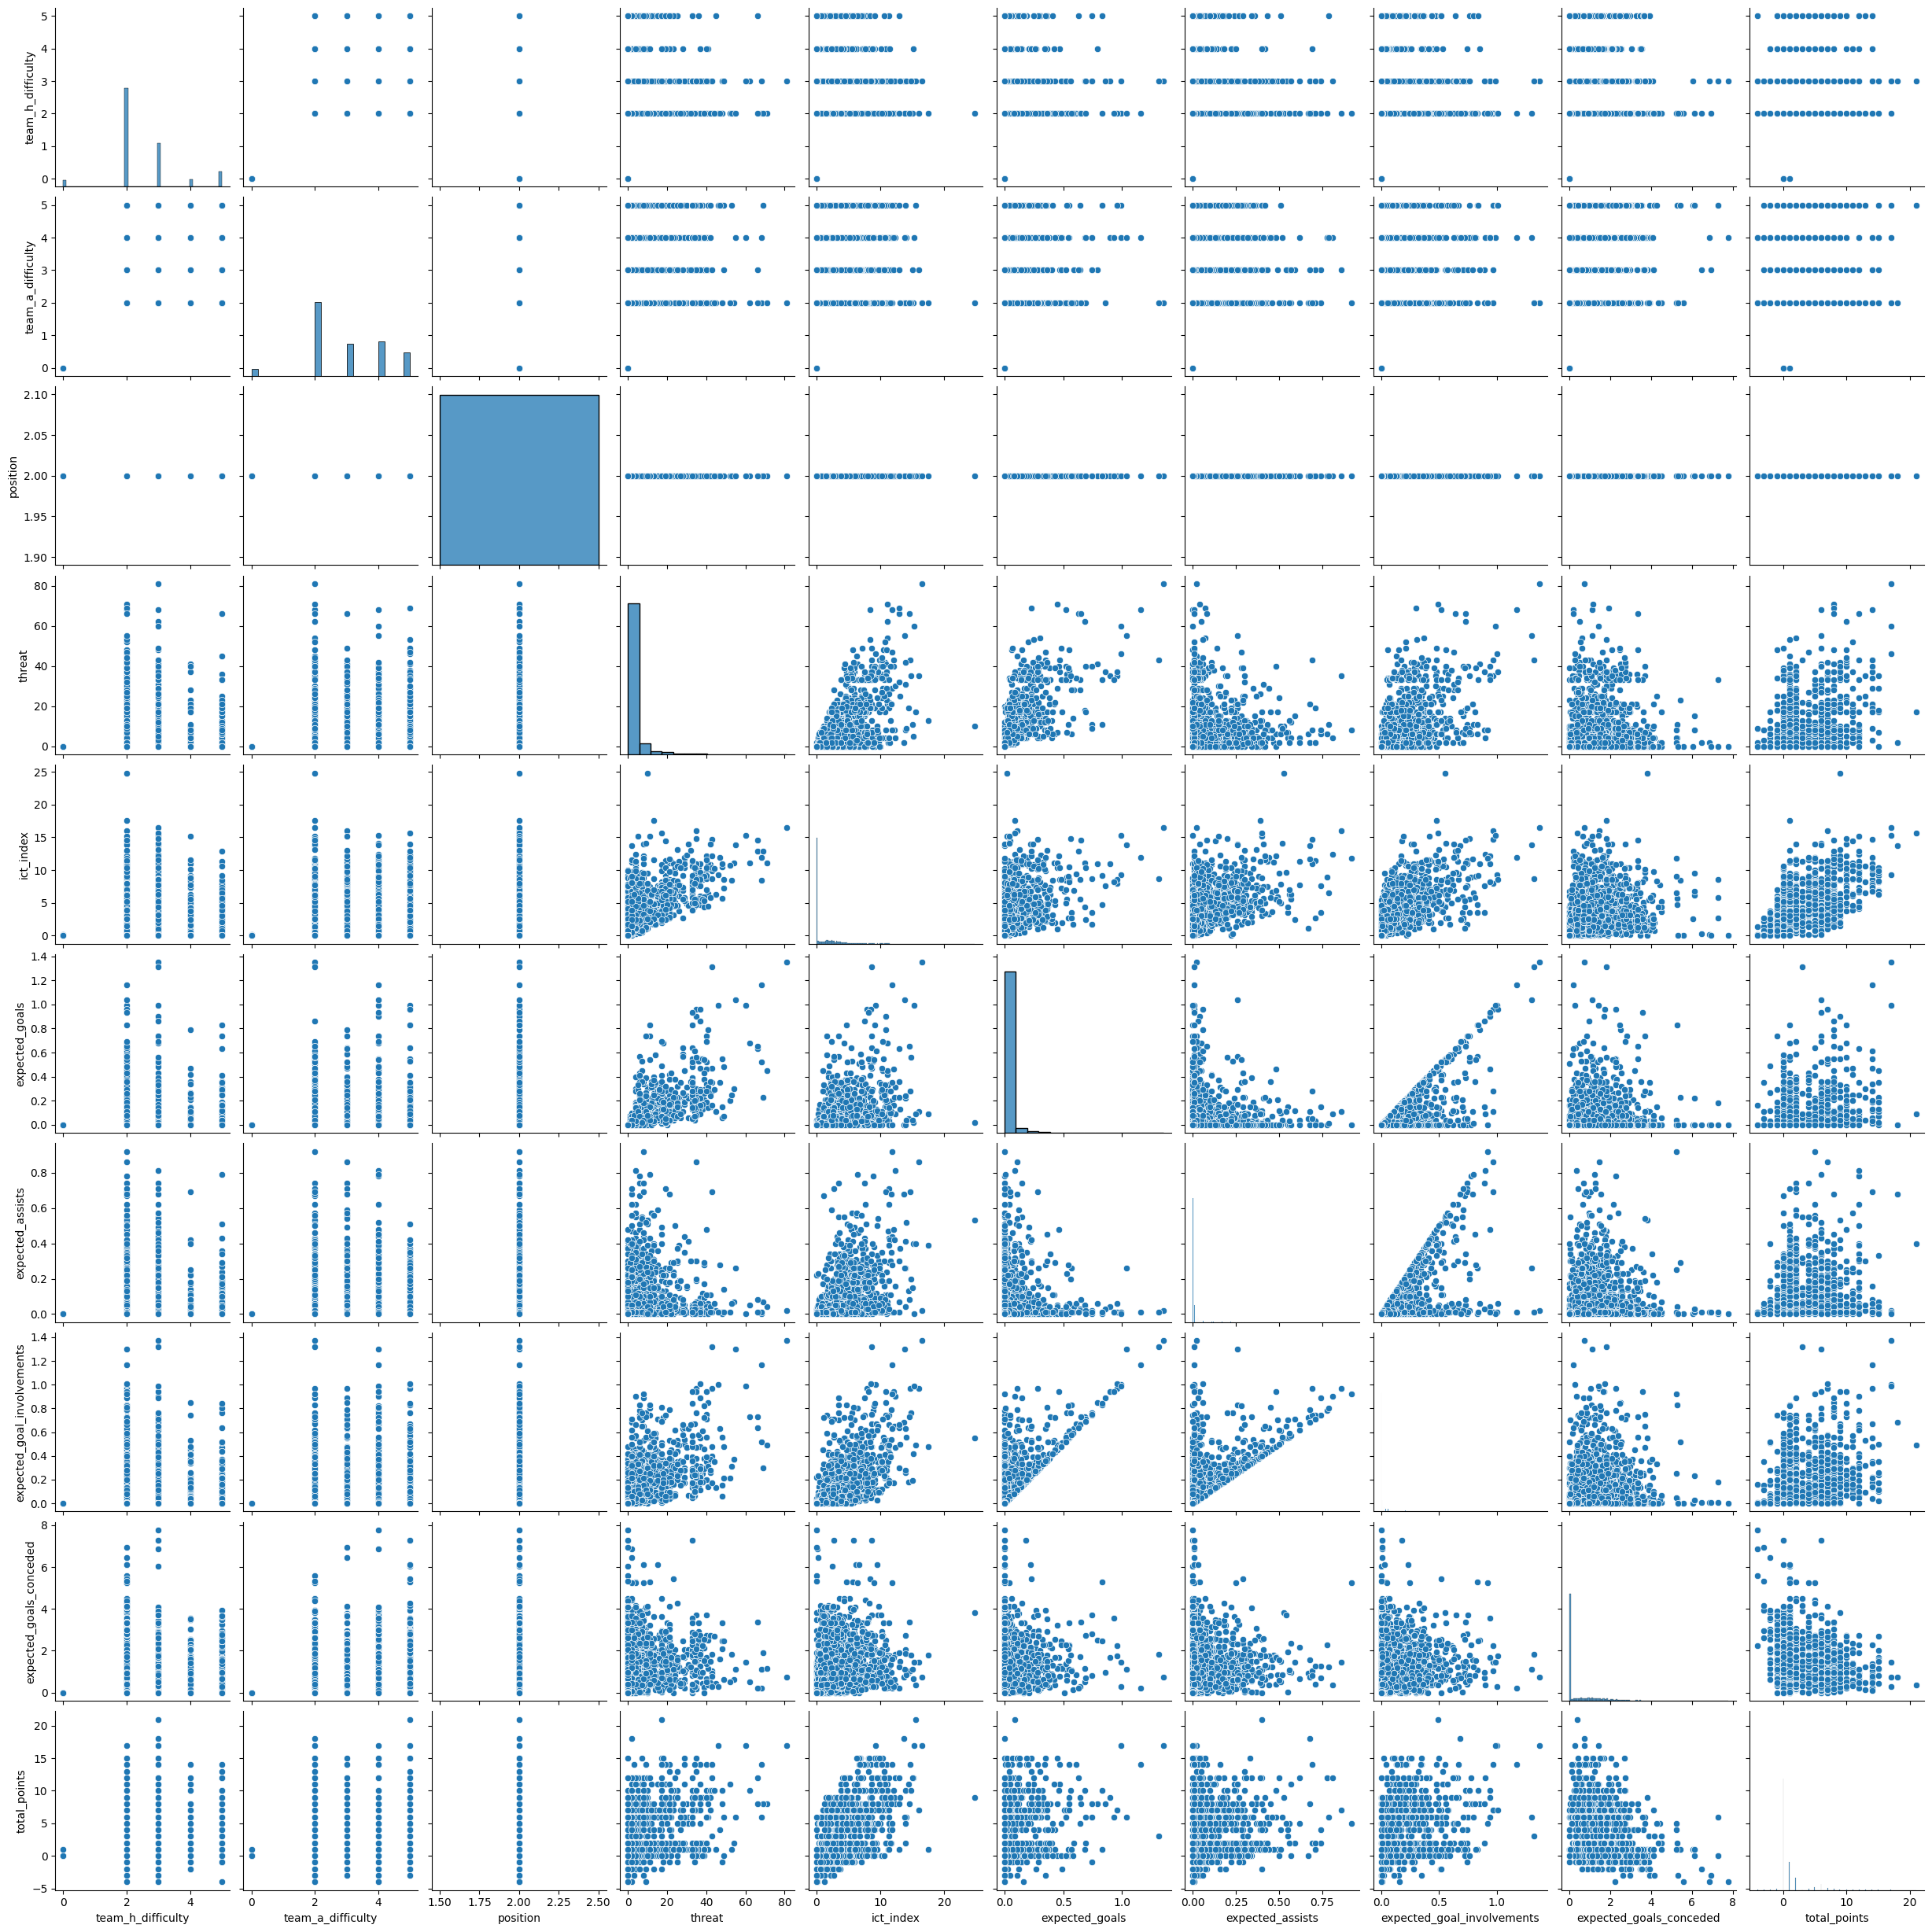

In [21]:
import seaborn as sns
sns.pairplot(defenders.loc[:,attributes])

# From the pair plots
## - ict_index is the greatest predictor of the total points of the player points, then expected_goal_involvement
## -

In [22]:
from sklearn.model_selection import train_test_split
# Store the 'total_points' target in the 'player_target' variable
# and the rest in the player_features variable
player_target = forwards['total_points']
player_features = forwards.drop("total_points", axis=1)

# The train_test_split function splits the set into train and test sets while maintain the same data distribution over both sets.
## It takes the feature and target sets and reutrns the respective train and test sets
features_train, features_test, target_train, target_test = train_test_split(player_features, player_target, test_size=0.2)




## Using ML Models to Predict Points in Fantasy Premier League
For this project we are going to compare to Linear Regression, Decision Trees and Random Forests and find out how they all perform.


### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Before using our data, we need to do feature scaling and we opt for the 'standardization' method of scaling.
## The 'standardization' is avaliable thorugh the StandardScaler() method
# Transformers help in batching tasks in a pipepline. In this case, the data is scaled and then a linear regression model is fitted on the scaled data.
# We use a transformer that takes the regression model and the transformation method
# The TransformedTargetRegressor does the transformation and when we do the prediction, it automatically does the inverse transformation (scaling) and returns the values
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())

# fit the transofrmer on the train data
model.fit(features_train, target_train)

# With the model fitted, we can predict the total_points given the feature_train and feature_test set
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

# Evaluate the performance of the model on both sets using the root mean square error
train_MSE = mean_squared_error(target_train, pred_train)
test_MSE = mean_squared_error(target_test, pred_test)


# Get the score of the model or the coeeficient of determination i.e how much of the target value can be explained by the model.
## In this case, 0.6 implies that 60% of the variations in the target value can be explained by the model and 40% is not explainable
R2_train = model.score(features_train, target_train)
R2_test = model.score(features_test, target_test)

# If the test error significantly differs from the train error, then there is either overfitting or underfitting

print('Training set MSE: {}'.format(train_MSE))
print('Test set MSE: {}'.format(test_MSE))


print('Training set R2: {}'.format(R2_train))
print('Test set R2: {}'.format(R2_test))



# Carry out cross validation of the model.
# The evaluation method is the root mean square error
# The method expects a utility function (greater is better) and so the scoring function is the opposite of the the RMSE. Hence the -ve
tree_rmses = -cross_val_score(model, features_train, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tree_rmses).describe()

Training set MSE: 1.0102166413309281
Test set MSE: 0.9793234708085105
Training set R2: 0.8561415878674135
Test set R2: 0.8009870493993597


count    10.000000
mean      1.000704
std       0.182998
min       0.764515
25%       0.863980
50%       1.002198
75%       1.061767
max       1.323432
dtype: float64

### DecisionTree

In [24]:
from sklearn.tree import DecisionTreeRegressor
# The DecisionTreeRegressor is passed as the model to the TransformedTreeRegressor together with the StandardScaler
model = TransformedTargetRegressor(DecisionTreeRegressor(), transformer=StandardScaler())
model.fit(features_train, target_train)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

train_MSE = mean_squared_error(target_train, pred_train)
test_MSE = mean_squared_error(target_test, pred_test)

R2_train = model.score(features_train, target_train)
R2_test = model.score(features_test, target_test)

print('Training set MSE: {}'.format(train_MSE))
print('Test set MSE: {}'.format(test_MSE))
print('Training set R2: {}'.format(R2_train))
print('Test set R2: {}'.format(R2_test))

from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(model, features_train, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

Training set MSE: 0.005416155888071095
Test set MSE: 1.8848542352496673
Training set R2: 0.9992287203021186
Test set R2: 0.6169698633900136


count    10.000000
mean      1.361249
std       0.284497
min       0.945515
25%       1.111278
50%       1.418680
75%       1.532233
max       1.866316
dtype: float64

### RandomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


# RandomForestRegressor is an ensemble method
# The TransformedTargetRegressor is passed the RandomForestRegressor model
# The RandomForestRegressor is passed some hyper-parameters such as;
## n_esimtaors: number of trees in the forest,
## max_depth: the maximum depth of the tree,
## criterion: the function to measure the quality of the split

model = TransformedTargetRegressor(RandomForestRegressor(n_estimators=200,  max_depth=8, criterion="squared_error", random_state=18), transformer=StandardScaler())
model.fit(features_train, target_train)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

train_MSE = mean_squared_error(target_train, pred_train)
test_MSE = mean_squared_error(target_test, pred_test)

R2_train = model.score(features_train, target_train)
R2_test = model.score(features_test, target_test)

print('Training set MSE: {}'.format(train_MSE))
print('Test set MSE: {}'.format(test_MSE))
print('Training set R2: {}'.format(R2_train))
print('Test set R2: {}'.format(R2_test))


tree_rmses = -cross_val_score(model, features_train, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

Training set MSE: 0.3204306044584551
Test set MSE: 0.877860817656493
Training set R2: 0.9543695519652622
Test set R2: 0.8216057546397048


count    10.000000
mean      1.009153
std       0.193684
min       0.724794
25%       0.859310
50%       1.027193
75%       1.149558
max       1.294438
dtype: float64

## Fine Tunning the Models
From the above, we see that RandomForestRegressor performs the best MSE and they do not differ that much on the test and the train sets.
In order to improve its performance we carry out Cross validation.

### GridSearchCV

At this stage we are doing hyperparameter tuning i.e. finding the best combination of hyperparameters to be passed to the RandomForestRegressor.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instatiate the model
RModel = RandomForestRegressor()


param_grid = {'n_estimators': [8,10,12,14,16,18,20]}

# Define the possible values of the hyperparameter
grid = {
    'n_estimators': [8, 10, 12, 14, 16, 18, 20, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'random_state' : [18]
}

# Deine the model with cv=3 for a 3-fold cross validation
# GridSearchCV has the best_estimator_ parameter that returns the  estimator
# which gave highest score (or smallest loss if specified)

grid_search = GridSearchCV(RModel, grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(features_train, target_train)

# Get the best param combination
grid_search.best_estimator_

KeyboardInterrupt: 

### RandomForestRegressor using the best hyperparameters from the GridSearchCV


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


# RandomForestRegressor is an ensemble method
# The TransformedTargetRegressor is passed the RandomForestRegressor model
# The RandomForestRegressor is passed some hyper-parameters such as;
## n_esimtaors: number of trees in the forest,
## max_depth: the maximum depth of the tree,
## criterion: the function to measure the quality of the split

model = TransformedTargetRegressor(RandomForestRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='log2', n_estimators=500, random_state=18), transformer=StandardScaler())
model.fit(features_train, target_train)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

train_MSE = mean_squared_error(target_train, pred_train)
test_MSE = mean_squared_error(target_test, pred_test)

R2_train = model.score(features_train, target_train)
R2_test = model.score(features_test, target_test)

print('Training set MSE: {}'.format(train_MSE))
print('Test set MSE: {}'.format(test_MSE))
print('Training set R2: {}'.format(R2_train))
print('Test set R2: {}'.format(R2_test))

tree_rmses = -cross_val_score(model, features_train, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tree_rmses).describe()

Training set MSE: 0.43901724644215323
Test set MSE: 0.8550124905564296
Training set R2: 0.9374823959653029
Test set R2: 0.8262488711665844


count    10.000000
mean      1.107799
std       0.166319
min       0.893803
25%       0.941276
50%       1.134525
75%       1.236013
max       1.322714
dtype: float64

In [ ]:
len(pred_test), len(target_test)

(4568, 4568)

In [ ]:
pd.DataFrame({'total_points': target_test})
# target_test

,total_points
5624,0
11098,0
20078,1
2636,0
22762,0
...,...
11226,0
1406,0
1356,1
20588,0


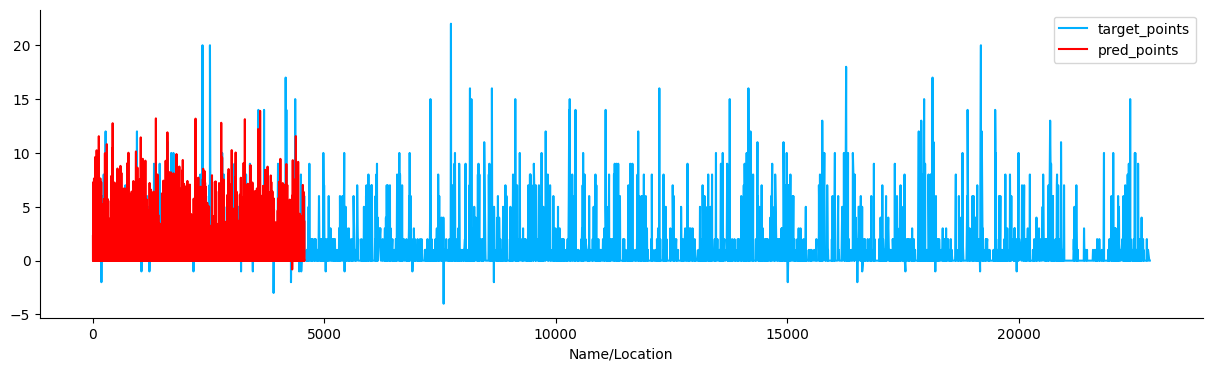

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

fig, ax = plt.subplots(1, 1, figsize=(15, 4))
sns.lineplot(data=pd.DataFrame({'target_points': target_test}))
sns.lineplot(data=pd.DataFrame({'pred_points': pred_test}), palette=['r'])
ax.set_xlabel('Name/Location')
plt.show()

In [ ]:
!pip install sklearn_evaluation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.3 MB/s eta 0:00:00


Deploy Dash apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


<Axes: title={'center': 'Residuals Plot'}, xlabel='Predicted Value', ylabel='Residuals'>

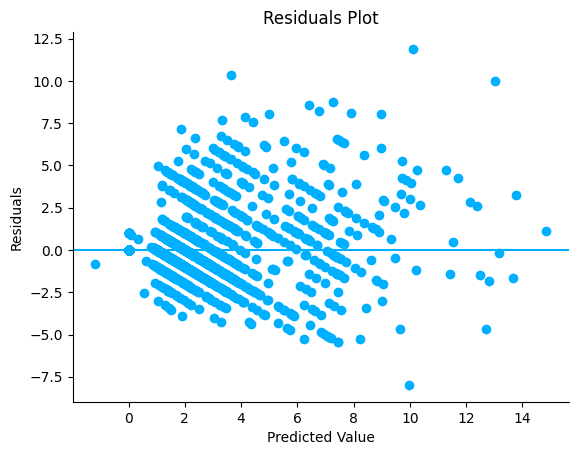

In [ ]:
from sklearn_evaluation import plot
plot.residuals(target_test, pred_test )

### RadomGridSearchCV
This allows for specifying the range in which values can be picked instead of listing the hyperparamter values.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

# Generate random numbers between 2 aand 100 for the n_estimators parameter
param_distribs = {'n_estimators': randint(low=2, high=100)}

rnd_search = RandomizedSearchCV(
    RandomForestRegressor(), param_distributions=param_distribs,
    cv=3,
    scoring='neg_root_mean_squared_error', random_state=42
  )
rnd_search.fit(features_train,target_train)

# Get the best param combination
rnd_search.best_params_

KeyboardInterrupt: 